In [2]:
import pandas as pd
import sys
from catboost import CatBoostClassifier 
import numpy as np
from catboost import Pool, cv

In [3]:
#train  = pd.read_excel('train.xlsx')
train = pd.read_csv('fixed_train.csv')
test = pd.read_excel('test.xlsx')
result = pd.read_excel('result.xlsx')

In [9]:
prices = {'bk': 2450, 'GZ1': 2050, 'GZ2': 2050, 'GZ3': 2050,
          'GZ4': 2050, 'GZ5': 2050, 'GZ7': 2050,
          'DGK': 1300, 'NKTD': 2050, 'NKTM': 2050, 'NKTR': 2050,
          'ALPS': 1150}

In [3]:
train = train[train['well id'].notnull()]
train.head()

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
0,12.0,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,0.774000,0.799167,0.174639,0.727789,NK,0.0
1,33.0,2412.8305,NaN,0.157153,0.755472,0.453216,0.715147,NaN,0.523432,0.388729,0.519233,0.799167,0.563573,0.111216,ARGILLIT,0.0
2,33.0,2522.5575,NaN,0.172235,0.941742,0.525711,0.668600,NaN,0.588924,0.515214,0.527139,0.799167,0.551152,0.172359,ARGILLIT,0.0
3,49.0,2396.3625,0.381248,0.246838,0.116913,0.732654,0.151299,0.165219,0.656955,0.445917,0.575175,0.799167,0.429433,0.253563,ARGILLIT,0.0
4,49.0,2399.0475,0.356867,0.226241,0.155473,0.613300,0.173949,0.297194,0.773218,0.392743,0.575725,0.799167,0.447169,0.959633,ARGILLIT,0.0


In [4]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [4]:
#train.to_csv('fixed_train.csv', index=False)

In [5]:
#train = pd.read_csv('fixed_train.csv')
#train.head()

In [4]:
import matplotlib.pyplot as plt

def extract_well(df, well_id):
    return df[df['well id'] == well_id].sort_values(by='depth, m')

def add_mean_std_features(df, base_feature_names, win_width=100, fill_nan_borders=True):
    unique_ids = df['well id'].unique()
    for base_feature in base_feature_names:
        df[base_feature + '_mean_' + str(win_width)] = None
        df[base_feature + '_std_' + str(win_width)] = None

    for uid in unique_ids:
        uid_df = extract_well(df, uid)
        for base_feature in base_feature_names:
            avg_feature_vals = uid_df[base_feature].rolling(win_width).mean()
            std_feature_vals = uid_df[base_feature].rolling(win_width).std()
            if fill_nan_borders:
                avg_feature_vals.iloc[:win_width] = avg_feature_vals.iloc[win_width+1]
                std_feature_vals.iloc[:win_width] = std_feature_vals.iloc[win_width+1]
            df[base_feature + '_mean_' + str(win_width)][avg_feature_vals.index] = avg_feature_vals
            df[base_feature + '_std_' + str(win_width)][std_feature_vals.index] = std_feature_vals
    return df

In [5]:
prices

NameError: name 'prices' is not defined

In [8]:
%%time
train = add_mean_std_features(train, prices.keys())

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

CPU times: user 6min 13s, sys: 1.13 s, total: 6min 14s
Wall time: 6min 14s


In [9]:
%%time
train = add_mean_std_features(train, prices.keys(), win_width=50)

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

CPU times: user 6min 43s, sys: 1.26 s, total: 6min 44s
Wall time: 6min 44s


In [10]:
%%time
train = add_mean_std_features(train, prices.keys(), win_width=10)

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

CPU times: user 8min 9s, sys: 2.21 s, total: 8min 11s
Wall time: 8min 11s


In [11]:
#train['2-1'] = train['GZ2'] - train['GZ1']
#train['3-2'] = train['GZ3'] - train['GZ2']
#train['4-3'] = train['GZ4'] - train['GZ3']
#train['5-4'] = train['GZ5'] - train['GZ4']
#train['7-5'] = train['GZ7'] - train['GZ5']

In [6]:
train[:5]

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,...,GZ4_mean_50,GZ4_std_50,GZ1_mean_50,GZ1_std_50,GZ5_mean_50,GZ5_std_50,GZ3_mean_50,GZ3_std_50,NKTR_mean_50,NKTR_std_50
0,12.0,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,...,0.289396,0.083638,0.549723,0.093782,0.534064,0.126169,0.228647,0.042243,0.313424,0.071802
1,33.0,2412.8305,NaN,0.157153,0.755472,0.453216,0.715147,NaN,0.523432,0.388729,...,0.679849,0.035879,0.146223,0.014859,NaN,NaN,0.425147,0.026529,0.566260,0.014143
2,33.0,2522.5575,NaN,0.172235,0.941742,0.525711,0.668600,NaN,0.588924,0.515214,...,0.651627,0.023859,0.155702,0.029602,NaN,NaN,0.440186,0.041092,0.570614,0.010985
3,49.0,2396.3625,0.381248,0.246838,0.116913,0.732654,0.151299,0.165219,0.656955,0.445917,...,0.411672,0.214019,0.309506,0.079262,0.184682,0.076317,0.668170,0.248292,0.423467,0.027518
4,49.0,2399.0475,0.356867,0.226241,0.155473,0.613300,0.173949,0.297194,0.773218,0.392743,...,0.197349,0.170724,0.238382,0.022363,0.173726,0.030309,0.717243,0.079578,0.436785,0.011339


In [7]:
test[:5]

,id,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS
0,1,47,2465.5460,0.665198,0.259688,0.865866,0.526683,0.116218,0.464870,0.124486,0.196296,0.483192,0.643774,0.376472,0.261831
1,2,47,2465.6355,0.115153,0.258287,0.161988,0.583114,0.122256,0.477795,0.118895,0.146578,0.491132,0.655735,0.359872,0.236470
2,3,47,2465.7250,0.155254,0.318849,0.125817,0.639544,0.128194,0.497212,0.111693,0.968615,0.499726,0.667695,0.343272,0.266756
3,4,47,2465.8145,0.125315,0.474215,0.149127,0.638636,0.128239,0.478265,0.987464,0.546126,0.492469,0.659642,0.341159,0.332568
4,5,47,2465.9040,0.953756,0.638341,0.172437,0.637663,0.113455,0.465892,0.858188,0.123651,0.485865,0.651513,0.339456,0.398383


In [10]:
%%time
test = add_mean_std_features(test, prices.keys(), win_width=100)
test = add_mean_std_features(test, prices.keys(), win_width=10)
test = add_mean_std_features(test, prices.keys(), win_width=50)

#test['2-1'] = test['GZ2'] - test['GZ1']
#test['3-2'] = test['GZ3'] - test['GZ2']
#test['4-3'] = test['GZ4'] - test['GZ3']
#test['5-4'] = test['GZ5'] - test['GZ4']
#test['7-5'] = test['GZ7'] - test['GZ5']

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CPU times: user 13.7 s, sys: 88 ms, total: 13.7 s
Wall time: 13.7 s


In [16]:
train.to_csv('new_train.csv')

In [17]:
test.to_csv('new_test.csv')

Random well 179	feature GZ2


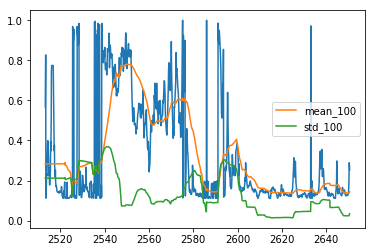

In [14]:
import random

rand_id = random.sample(set(train['well id'].unique()), 1)[0]
print('Random well %d' % rand_id, end='\t')

well_df = extract_well(train, rand_id)
rand_feat = random.sample(prices.keys(), 1)[0]
print('feature', rand_feat)
plt.plot(well_df['depth, m'].values, well_df[rand_feat].values)
plt.plot(well_df['depth, m'].values, well_df[rand_feat + '_mean_100'].values, label='mean_100')
plt.plot(well_df['depth, m'].values, well_df[rand_feat + '_std_100'].values, label='std_100')
plt.legend()
plt.show()

In [15]:
train.to_csv('fixed_train.csv', index=False)
train = pd.read_csv('fixed_train.csv')
train.head()

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,...,GZ4_mean_100,GZ4_std_100,GZ1_mean_100,GZ1_std_100,GZ5_mean_100,GZ5_std_100,GZ3_mean_100,GZ3_std_100,NKTR_mean_100,NKTR_std_100
0,12.0,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,...,0.269450,0.186747,0.482238,0.149478,0.452922,0.123729,0.355814,0.219079,0.346182,0.066846
1,33.0,2412.8305,NaN,0.157153,0.755472,0.453216,0.715147,NaN,0.523432,0.388729,...,0.738095,0.088749,0.178386,0.043630,NaN,NaN,0.479756,0.085512,0.556055,0.023041
2,33.0,2522.5575,NaN,0.172235,0.941742,0.525711,0.668600,NaN,0.588924,0.515214,...,0.651319,0.042437,0.146231,0.023314,NaN,NaN,0.436573,0.034783,0.573282,0.009601
3,49.0,2396.3625,0.381248,0.246838,0.116913,0.732654,0.151299,0.165219,0.656955,0.445917,...,0.444321,0.189258,0.300475,0.145440,0.253013,0.184455,0.544226,0.253215,0.415207,0.063748
4,49.0,2399.0475,0.356867,0.226241,0.155473,0.613300,0.173949,0.297194,0.773218,0.392743,...,0.320596,0.216756,0.304713,0.140996,0.255626,0.184275,0.613094,0.240285,0.409154,0.055561


In [11]:
train.head()

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,...,GZ4_mean_50,GZ4_std_50,GZ1_mean_50,GZ1_std_50,GZ5_mean_50,GZ5_std_50,GZ3_mean_50,GZ3_std_50,NKTR_mean_50,NKTR_std_50
0,12.0,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,...,0.289396,0.083638,0.549723,0.093782,0.534064,0.126169,0.228647,0.042243,0.313424,0.071802
1,33.0,2412.8305,NaN,0.157153,0.755472,0.453216,0.715147,NaN,0.523432,0.388729,...,0.679849,0.035879,0.146223,0.014859,NaN,NaN,0.425147,0.026529,0.566260,0.014143
2,33.0,2522.5575,NaN,0.172235,0.941742,0.525711,0.668600,NaN,0.588924,0.515214,...,0.651627,0.023859,0.155702,0.029602,NaN,NaN,0.440186,0.041092,0.570614,0.010985
3,49.0,2396.3625,0.381248,0.246838,0.116913,0.732654,0.151299,0.165219,0.656955,0.445917,...,0.411672,0.214019,0.309506,0.079262,0.184682,0.076317,0.668170,0.248292,0.423467,0.027518
4,49.0,2399.0475,0.356867,0.226241,0.155473,0.613300,0.173949,0.297194,0.773218,0.392743,...,0.197349,0.170724,0.238382,0.022363,0.173726,0.030309,0.717243,0.079578,0.436785,0.011339


In [16]:
for win_size in [10, 50]:
    train = add_mean_std_features(train, prices.keys(), win_width=win_size)

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value i

In [17]:
train.to_csv('fixed_train.csv', index=False)
train = pd.read_csv('fixed_train.csv')
train.head()

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,...,GZ4_mean_50,GZ4_std_50,GZ1_mean_50,GZ1_std_50,GZ5_mean_50,GZ5_std_50,GZ3_mean_50,GZ3_std_50,NKTR_mean_50,NKTR_std_50
0,12.0,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,...,0.289396,0.083638,0.549723,0.093782,0.534064,0.126169,0.228647,0.042243,0.313424,0.071802
1,33.0,2412.8305,NaN,0.157153,0.755472,0.453216,0.715147,NaN,0.523432,0.388729,...,0.679849,0.035879,0.146223,0.014859,NaN,NaN,0.425147,0.026529,0.566260,0.014143
2,33.0,2522.5575,NaN,0.172235,0.941742,0.525711,0.668600,NaN,0.588924,0.515214,...,0.651627,0.023859,0.155702,0.029602,NaN,NaN,0.440186,0.041092,0.570614,0.010985
3,49.0,2396.3625,0.381248,0.246838,0.116913,0.732654,0.151299,0.165219,0.656955,0.445917,...,0.411672,0.214019,0.309506,0.079262,0.184682,0.076317,0.668170,0.248292,0.423467,0.027518
4,49.0,2399.0475,0.356867,0.226241,0.155473,0.613300,0.173949,0.297194,0.773218,0.392743,...,0.197349,0.170724,0.238382,0.022363,0.173726,0.030309,0.717243,0.079578,0.436785,0.011339


Random well 193	feature NKTD


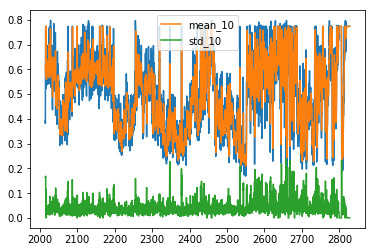

In [20]:
import random

rand_id = random.sample(set(train['well id'].unique()), 1)[0]
print('Random well %d' % rand_id, end='\t')

well_df = extract_well(train, rand_id)
rand_feat = random.sample(prices.keys(), 1)[0]
print('feature', rand_feat)
wd = random.sample({10, 50, 100}, 1)[0]

plt.plot(well_df['depth, m'].values, well_df[rand_feat].values)
plt.plot(well_df['depth, m'].values, well_df[rand_feat + '_mean_'+ str(wd)].values, label='mean_'+str(wd))
plt.plot(well_df['depth, m'].values, well_df[rand_feat + '_std_' + str(wd)].values, label='std_'+str(wd))
plt.legend()
plt.show()

In [21]:
set1 = set(sorted(train[train['bk'].notnull()]['well id'].unique()))
set2 = set(sorted(train[train['bk'].isnull()]['well id'].unique()))

set1 & set2

{4.0, 5.0, 15.0, 42.0, 57.0, 149.0, 241.0, 272.0, 275.0, 278.0, 287.0}

In [22]:
len(set1), len(set2), len(set1 & set2)

(251, 42, 11)

In [23]:
well_df = extract_well(train, random.sample(set1, 1)[0])
well_df.head()

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,...,GZ4_mean_50,GZ4_std_50,GZ1_mean_50,GZ1_std_50,GZ5_mean_50,GZ5_std_50,GZ3_mean_50,GZ3_std_50,NKTR_mean_50,NKTR_std_50
100161,2.0,2419.7220,0.263649,0.115797,0.447382,0.331176,0.431442,0.158827,0.862171,0.527235,...,0.405093,0.176516,0.317204,0.215922,0.264624,0.158683,0.446227,0.202679,0.384091,0.07205
86525,2.0,2419.8115,0.386956,0.129744,0.458964,0.314129,0.491432,0.146652,0.763633,0.564549,...,0.405093,0.176516,0.317204,0.215922,0.264624,0.158683,0.446227,0.202679,0.384091,0.07205
75208,2.0,2419.9010,0.338953,0.143692,0.475474,0.298144,0.386883,0.142422,0.719993,0.512637,...,0.405093,0.176516,0.317204,0.215922,0.264624,0.158683,0.446227,0.202679,0.384091,0.07205
77674,2.0,2419.9905,0.332599,0.165913,0.498559,0.296730,0.369227,0.139837,0.782323,0.511865,...,0.405093,0.176516,0.317204,0.215922,0.264624,0.158683,0.446227,0.202679,0.384091,0.07205
80562,2.0,2420.0800,0.321961,0.188129,0.525565,0.295319,0.351571,0.137252,0.696555,0.511918,...,0.405093,0.176516,0.317204,0.215922,0.264624,0.158683,0.446227,0.202679,0.384091,0.07205


In [19]:
test[:5]

,id,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,...,GZ7_std_10,GZ4_mean_10,GZ4_std_10,GZ1_mean_10,GZ1_std_10,2-1,3-2,4-3,5-4,7-5
0,1,47,2465.5460,0.665198,0.259688,0.865866,0.526683,0.116218,0.464870,0.124486,...,0.257017,0.453155,0.300218,0.547651,0.129873,0.606177,-0.339182,-0.410465,0.348652,-0.340383
1,2,47,2465.6355,0.115153,0.258287,0.161988,0.583114,0.122256,0.477795,0.118895,...,0.257017,0.453155,0.300218,0.547651,0.129873,-0.096298,0.421125,-0.460858,0.355539,-0.358900
2,3,47,2465.7250,0.155254,0.318849,0.125817,0.639544,0.128194,0.497212,0.111693,...,0.257017,0.453155,0.300218,0.547651,0.129873,-0.193032,0.513727,-0.511350,0.369019,-0.385520
3,4,47,2465.8145,0.125315,0.474215,0.149127,0.638636,0.128239,0.478265,0.987464,...,0.257017,0.453155,0.300218,0.547651,0.129873,-0.325088,0.489509,-0.510397,0.350026,0.509198
4,5,47,2465.9040,0.953756,0.638341,0.172437,0.637663,0.113455,0.465892,0.858188,...,0.257017,0.453155,0.300218,0.547651,0.129873,-0.465904,0.465226,-0.524208,0.352437,0.392296


In [22]:
from sklearn import preprocessing

dense_train = train[train.columns[1:]].drop('goal', axis=1).drop('lith', axis=1)
dense_test = test[test.columns[2:]]

min_max_scaler = preprocessing.MinMaxScaler()
dense_train_scaled = min_max_scaler.fit_transform(dense_train)

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [23]:
dense_test_scaled = min_max_scaler.transform(dense_test)

In [24]:
target = train['goal']

In [25]:
target[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: goal, dtype: float64

In [26]:
ln = len(target)

In [27]:
dense_train_scaled.shape

(463897, 90)

In [28]:
np.sum(target == 1) 

69870

In [34]:
cv_dataset = Pool(data=dense_train_scaled,
                  label=target)

In [35]:
params = {"class_weights": [np.sum(target == 1)/ln, np.sum(target == 0)/ln],
          "loss_function": "Logloss",
          "eval_metric": "F1",
          "iterations": 1000,
          "verbose": False}

In [36]:
scores = cv(cv_dataset,
            params,
            fold_count=3,
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [29]:
train['well id'].shape

(463897,)

In [13]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [17]:
import random
from sklearn import preprocessing

In [15]:
rand_wells = random.sample(list(train['well id'].unique()), 40)

tr_train = train[~train['well id'].isin(rand_wells)]
val_train = train[train['well id'].isin(rand_wells)]

print(tr_train.shape, val_train.shape)

(401197, 88) (62700, 88)


In [19]:
test[:5]

,id,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,...,GZ1_mean_50,GZ1_std_50,NKTR_mean_50,NKTR_std_50,GZ7_mean_50,GZ7_std_50,GZ5_mean_50,GZ5_std_50,NKTD_mean_50,NKTD_std_50
0,1,47,2465.5460,0.665198,0.259688,0.865866,0.526683,0.116218,0.464870,0.124486,...,0.41176,0.092512,0.399214,0.035714,0.426495,0.132352,0.685899,0.339916,0.407485,0.038407
1,2,47,2465.6355,0.115153,0.258287,0.161988,0.583114,0.122256,0.477795,0.118895,...,0.41176,0.092512,0.399214,0.035714,0.426495,0.132352,0.685899,0.339916,0.407485,0.038407
2,3,47,2465.7250,0.155254,0.318849,0.125817,0.639544,0.128194,0.497212,0.111693,...,0.41176,0.092512,0.399214,0.035714,0.426495,0.132352,0.685899,0.339916,0.407485,0.038407
3,4,47,2465.8145,0.125315,0.474215,0.149127,0.638636,0.128239,0.478265,0.987464,...,0.41176,0.092512,0.399214,0.035714,0.426495,0.132352,0.685899,0.339916,0.407485,0.038407
4,5,47,2465.9040,0.953756,0.638341,0.172437,0.637663,0.113455,0.465892,0.858188,...,0.41176,0.092512,0.399214,0.035714,0.426495,0.132352,0.685899,0.339916,0.407485,0.038407


In [20]:
dense_train = tr_train[tr_train.columns[1:]].drop('goal', axis=1).drop('lith', axis=1)
dense_val = val_train[val_train.columns[1:]].drop('goal', axis=1).drop('lith', axis=1)
dense_test = test[test.columns[2:]]
min_max_scaler = preprocessing.MinMaxScaler()

dense_train_scaled = min_max_scaler.fit_transform(dense_train)
dense_val_scaled = min_max_scaler.transform(dense_val)
dense_test_scaled = min_max_scaler.transform(dense_test)

y_train = tr_train['goal']
y_val = val_train['goal']

dense_train_scaled.shape, dense_val_scaled.shape

((401197, 85), (62700, 85))

In [21]:
dense_test_scaled.shape

(37604, 85)

In [23]:
ln = len(y_train)

In [24]:
[np.sum(y_train==1)/ln, np.sum(y_train == 0)/ln]

[0.15157890014132708, 0.8484210998586729]

In [27]:
train.to_csv('fixed_train_1.csv')

In [28]:
test.to_csv('fixed_test_1.csv')

In [25]:
dense_train_scaled.shape

(401197, 85)

In [30]:
ln = len(y_train)

model = CatBoostClassifier(iterations=305, 
                           class_weights=[np.sum(y_train==1)/ln, np.sum(y_train == 0)/ln], 
                           eval_metric="F1")
model.fit(
    X=dense_train_scaled, y=y_train,
    eval_set=(dense_val_scaled, y_val),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.243402
0:	learn: 0.8272269	test: 0.8252199	best: 0.8252199 (0)	total: 229ms	remaining: 1m 9s
1:	learn: 0.8343902	test: 0.8426436	best: 0.8426436 (1)	total: 368ms	remaining: 55.8s
2:	learn: 0.8309883	test: 0.8477005	best: 0.8477005 (2)	total: 507ms	remaining: 51.1s
3:	learn: 0.8428565	test: 0.8543818	best: 0.8543818 (3)	total: 608ms	remaining: 45.7s
4:	learn: 0.8471395	test: 0.8594917	best: 0.8594917 (4)	total: 710ms	remaining: 42.6s
5:	learn: 0.8476431	test: 0.8664276	best: 0.8664276 (5)	total: 802ms	remaining: 40s
6:	learn: 0.8500512	test: 0.8625499	best: 0.8664276 (5)	total: 899ms	remaining: 38.3s
7:	learn: 0.8524306	test: 0.8698313	best: 0.8698313 (7)	total: 1.02s	remaining: 37.8s
8:	learn: 0.8544490	test: 0.8711126	best: 0.8711126 (8)	total: 1.12s	remaining: 37s
9:	learn: 0.8559380	test: 0.8735563	best: 0.8735563 (9)	total: 1.22s	remaining: 35.9s
10:	learn: 0.8571051	test: 0.8704375	best: 0.8735563 (9)	total: 1.31s	remaining: 35s
11:	learn: 0.8594763	test: 0.

95:	learn: 0.9120826	test: 0.8944325	best: 0.8955484 (87)	total: 6.98s	remaining: 15.2s
96:	learn: 0.9123371	test: 0.8946979	best: 0.8955484 (87)	total: 7.04s	remaining: 15.1s
97:	learn: 0.9127041	test: 0.8946570	best: 0.8955484 (87)	total: 7.09s	remaining: 15s
98:	learn: 0.9128127	test: 0.8945044	best: 0.8955484 (87)	total: 7.14s	remaining: 14.9s
99:	learn: 0.9130012	test: 0.8947685	best: 0.8955484 (87)	total: 7.2s	remaining: 14.8s
100:	learn: 0.9135989	test: 0.8951016	best: 0.8955484 (87)	total: 7.25s	remaining: 14.7s
101:	learn: 0.9138757	test: 0.8949375	best: 0.8955484 (87)	total: 7.33s	remaining: 14.6s
102:	learn: 0.9140535	test: 0.8947354	best: 0.8955484 (87)	total: 7.4s	remaining: 14.5s
103:	learn: 0.9144365	test: 0.8946570	best: 0.8955484 (87)	total: 7.47s	remaining: 14.4s
104:	learn: 0.9148183	test: 0.8945965	best: 0.8955484 (87)	total: 7.54s	remaining: 14.4s
105:	learn: 0.9150475	test: 0.8942633	best: 0.8955484 (87)	total: 7.62s	remaining: 14.3s
106:	learn: 0.9152950	test: 0.

187:	learn: 0.9312426	test: 0.8959484	best: 0.8970459 (123)	total: 12.1s	remaining: 7.55s
188:	learn: 0.9312811	test: 0.8952653	best: 0.8970459 (123)	total: 12.2s	remaining: 7.48s
189:	learn: 0.9314516	test: 0.8951611	best: 0.8970459 (123)	total: 12.3s	remaining: 7.43s
190:	learn: 0.9316308	test: 0.8953581	best: 0.8970459 (123)	total: 12.3s	remaining: 7.36s
191:	learn: 0.9317551	test: 0.8958863	best: 0.8970459 (123)	total: 12.4s	remaining: 7.3s
192:	learn: 0.9319229	test: 0.8949895	best: 0.8970459 (123)	total: 12.5s	remaining: 7.23s
193:	learn: 0.9320836	test: 0.8946530	best: 0.8970459 (123)	total: 12.5s	remaining: 7.17s
194:	learn: 0.9325593	test: 0.8946283	best: 0.8970459 (123)	total: 12.6s	remaining: 7.11s
195:	learn: 0.9325548	test: 0.8947165	best: 0.8970459 (123)	total: 12.7s	remaining: 7.06s
196:	learn: 0.9326670	test: 0.8945277	best: 0.8970459 (123)	total: 12.8s	remaining: 7s
197:	learn: 0.9328629	test: 0.8947252	best: 0.8970459 (123)	total: 12.9s	remaining: 6.95s
198:	learn: 0.

281:	learn: 0.9416726	test: 0.8943040	best: 0.8970459 (123)	total: 17.9s	remaining: 1.46s
282:	learn: 0.9417438	test: 0.8945421	best: 0.8970459 (123)	total: 17.9s	remaining: 1.39s
283:	learn: 0.9418921	test: 0.8947068	best: 0.8970459 (123)	total: 18s	remaining: 1.33s
284:	learn: 0.9419875	test: 0.8941914	best: 0.8970459 (123)	total: 18s	remaining: 1.26s
285:	learn: 0.9420786	test: 0.8942355	best: 0.8970459 (123)	total: 18.1s	remaining: 1.2s
286:	learn: 0.9422337	test: 0.8942701	best: 0.8970459 (123)	total: 18.2s	remaining: 1.14s
287:	learn: 0.9423333	test: 0.8943745	best: 0.8970459 (123)	total: 18.2s	remaining: 1.08s
288:	learn: 0.9424464	test: 0.8943752	best: 0.8970459 (123)	total: 18.3s	remaining: 1.01s
289:	learn: 0.9425852	test: 0.8942708	best: 0.8970459 (123)	total: 18.4s	remaining: 952ms
290:	learn: 0.9426533	test: 0.8942443	best: 0.8970459 (123)	total: 18.5s	remaining: 888ms
291:	learn: 0.9426259	test: 0.8939736	best: 0.8970459 (123)	total: 18.5s	remaining: 824ms
292:	learn: 0.9

In [31]:
test[:5]

,id,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,...,GZ1_mean_50,GZ1_std_50,NKTR_mean_50,NKTR_std_50,GZ7_mean_50,GZ7_std_50,GZ5_mean_50,GZ5_std_50,NKTD_mean_50,NKTD_std_50
0,1,47,2465.5460,0.665198,0.259688,0.865866,0.526683,0.116218,0.464870,0.124486,...,0.41176,0.092512,0.399214,0.035714,0.426495,0.132352,0.685899,0.339916,0.407485,0.038407
1,2,47,2465.6355,0.115153,0.258287,0.161988,0.583114,0.122256,0.477795,0.118895,...,0.41176,0.092512,0.399214,0.035714,0.426495,0.132352,0.685899,0.339916,0.407485,0.038407
2,3,47,2465.7250,0.155254,0.318849,0.125817,0.639544,0.128194,0.497212,0.111693,...,0.41176,0.092512,0.399214,0.035714,0.426495,0.132352,0.685899,0.339916,0.407485,0.038407
3,4,47,2465.8145,0.125315,0.474215,0.149127,0.638636,0.128239,0.478265,0.987464,...,0.41176,0.092512,0.399214,0.035714,0.426495,0.132352,0.685899,0.339916,0.407485,0.038407
4,5,47,2465.9040,0.953756,0.638341,0.172437,0.637663,0.113455,0.465892,0.858188,...,0.41176,0.092512,0.399214,0.035714,0.426495,0.132352,0.685899,0.339916,0.407485,0.038407


In [ ]:
model.

In [32]:
predictions = model.predict(dense_test_scaled)
predictions_probs = model.predict_proba(dense_val_scaled)
print(predictions[:10])
print(predictions_probs[:10])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.55099956 0.44900044]
 [0.34898353 0.65101647]
 [0.18868089 0.81131911]
 [0.99768776 0.00231224]
 [0.99077325 0.00922675]
 [0.83514891 0.16485109]
 [0.56777408 0.43222592]
 [0.99089704 0.00910296]
 [0.99039048 0.00960952]
 [0.97744656 0.02255344]]


In [48]:
train['lith']

0                NK
1          ARGILLIT
2          ARGILLIT
3          ARGILLIT
4          ARGILLIT
5          ARGILLIT
6          ARGILLIT
7          ARGILLIT
8          ARGILLIT
9          ARGILLIT
10            DENSE
11        ALEVROLIT
12         ARGILLIT
13         ARGILLIT
14         ARGILLIT
15         ARGILLIT
16         ARGILLIT
17         ARGILLIT
18         ARGILLIT
19         ARGILLIT
20         ARGILLIT
21            DENSE
22            DENSE
23             SAND
24            DENSE
25        ALEVROLIT
26        ALEVROLIT
27             SAND
28         ARGILLIT
29             SAND
            ...    
463867     ARGILLIT
463868        DENSE
463869        DENSE
463870        DENSE
463871        DENSE
463872        DENSE
463873        DENSE
463874        DENSE
463875     ARGILLIT
463876     ARGILLIT
463877     ARGILLIT
463878     ARGILLIT
463879     ARGILLIT
463880     ARGILLIT
463881     ARGILLIT
463882     ARGILLIT
463883     ARGILLIT
463884     ARGILLIT
463885     ARGILLIT


In [43]:
result = pd.read_excel('result.xlsx', index_col='id')

In [45]:
result['goal'] = predictions

In [49]:
result.to_csv('main_result.csv')

In [54]:
test = pd.read_excel('test.xlsx', index_col='id')

In [55]:
test.fillna(0, inplace=True)

In [56]:
test['goal'] = predictions

In [57]:
dt = {47: 19.0, 95: 9.0, 126: 82.0, 164: 57.0, 176: 30.0}

In [59]:
train[:3]

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,...,GZ4_mean_50,GZ4_std_50,GZ1_mean_50,GZ1_std_50,GZ5_mean_50,GZ5_std_50,GZ3_mean_50,GZ3_std_50,NKTR_mean_50,NKTR_std_50
0,12.0,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774,0.244898,0.123651,...,0.289396,0.083638,0.549723,0.093782,0.534064,0.126169,0.228647,0.042243,0.313424,0.071802
1,33.0,2412.8305,0.000000,0.157153,0.755472,0.453216,0.715147,0.000,0.523432,0.388729,...,0.679849,0.035879,0.146223,0.014859,0.000000,0.000000,0.425147,0.026529,0.566260,0.014143
2,33.0,2522.5575,0.000000,0.172235,0.941742,0.525711,0.668600,0.000,0.588924,0.515214,...,0.651627,0.023859,0.155702,0.029602,0.000000,0.000000,0.440186,0.041092,0.570614,0.010985


In [60]:
import json

In [63]:
for i, (key, val) in enumerate(zip(dt.keys(), dt.values())):
    name_1 = str(i) + ".json" 
    name_2 = str(i) + "_1.json"
    from_save = test[test['well id'] == key]
    to_save = train[train['well id'] == val]
    jsf = from_save.to_json(orient='records')
    jst = to_save.to_json(orient='records')
    with open(name_1, 'w') as f:
        json.dump(jsf, f)
    with open(name_2, 'w') as f:
        json.dump(jst, f)

In [ ]:
test.to_json('')

In [ ]:
predictions_val

In [35]:
predictions.sum() / predictions.shape[0]

0.24300606318476758

In [110]:
sum(predictions == y_val) / len(y_val)

0.9154057661076361

In [36]:
model.save_model('catboost_models/model_1.pth')

In [102]:
model = CatBoostClassifier(iterations=1000)
model.load_model('catboost_models/full.pth')